# Calculs numériques avec Numpy

Le module par exellence est NumPy. Permet de faire énoooormément de choses !

### Vecteurs NumPy

In [1]:
import numpy as np

Le type qu'on utilise le plus avec NumPy : les vecteurs.

In [2]:
a = np.array([4,23,12])
type(a)

numpy.ndarray

Ils s'utilisent de la même façon que les listes.

In [3]:
a[0] = 72
a[0]

72

In [4]:
a.shape

(3,)

*Notez la syntaxe particulière : on s'écrit pas shape(a) comme si on appliquait une fonction shape. Cette syntaxe sert à utiliser une propriété d'un objet python. Comme si on écrivait : pomme.couleur , enfant.age , etoile.temperature*

Quelques façons extrèmement utiles de créer de façon rapide des vecteurs de taille donnée N.

In [5]:
N=10
c=np.linspace(0,2,N)
c

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [6]:
b=np.arange(10,42)
b

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])

In [7]:
d = np.ones(N)
d

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
e = np.zeros((N,2))
e

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

**Exercice : Écrire une fonction qui prend en argument un vecteur X, et renvoie un vecteur Y de même taille, dont le ième élément est le carré du ième élément du tableau X.**

In [9]:
def mettre_au_carre(x):
    N = len(x)
    carres = np.zeros(N)
    for i in range(N):
        carres[i] = x[i]**2
    return carres

In [10]:
a = np.arange(10)
mettre_au_carre(a)

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

C'était l'occasion de revoir les boucles for.

Cette façon d'opérer sur les vecteurs est "naturelle" : pour agir sur chaque élément du vecteur, on fait une boucle for. Cependant, elle est à bannir pour deux raisons :
* Elle est très lente, et si la taille des vecteurs dépasse par exemple N=10000, le script devient très long à executer.
* Il existe une méthode beaucoup plus rapide encodée exprès dans NumPy

In [11]:
N = 10
b=np.arange(N)

### Version beaucoup plus simple et plus rapide !
d=b**2
d

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

**Pour faire des opérations sur des vecteurs, on fait comme si chaque vecteur était un unique élément.** 

Numpy a redéfinit toutes les fonctions usuelles (+, -, cos, exp, ^2, etc.) pour que lorsqu'on les applique sur un vecteur, elles s'appliquent en fait élément par élément.

In [14]:
e = c+1
f = c*d
g = np.cos(b)

## Matrices NumPy

On peut créer des vecteurs à plusieurs dimensions (des matrices)

In [15]:
a=2*np.ones((3,2))
a

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [16]:
b=np.array([[1,9],[2,3]])
b

array([[1, 9],
       [2, 3]])

In [17]:
a*b

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [18]:
np.dot(a,b)

array([[ 6., 24.],
       [ 6., 24.],
       [ 6., 24.]])

Et faire de l'algèbre linéaire sur des matrices avec le module **linalg**

*inv* permet d'inverser les matrices, *eig* de trouver ses vecteurs et valeurs propres. 

In [19]:
np.linalg.eig(b)

(array([-2.35889894,  6.35889894]),
 array([[-0.93687907, -0.85921919],
        [ 0.34965357, -0.51160765]]))

In [20]:
np.linalg.inv(b)

array([[-0.2       ,  0.6       ],
       [ 0.13333333, -0.06666667]])

In [ ]:
b = np.ones(5)
a = np.array([[1,2,3,4,0.5],
              [0.9,0.8,7,6,5],
              [4,5,6,7,8],
              [8,0.6,9,5,2],
              [7,3,1,0,0.8]])

Résoudre $AX = B$ avec `np.linalg.solve`

In [ ]:
sol=np.linalg.solve(a,b) 
np.linalg.inv(a)

## Exercice

Vérifez cette solution

In [ ]:
np.dot(a,sol)

### Exercice 

**Mettre sous forme d'un système puis le résoudre le problème suivant.**

*Une mère et sa fille ont à eux deux 36 ans. Sachant que la mère a 30 ans de plus que la fille, quels âges ont-elles ?*

In [9]:
import numpy as np
B = np.array([36,30])
A = np.array([[1,1],[1,-1]])
sol = np.linalg.solve(A,B) 

print(f'Age mère : {int(sol[0])} ans, Age fille : {int(sol[1])} ans')

Age mère : 33 ans, Age fille : 3 ans


Autre solution avec la fonction fsolve de scipy

In [2]:
from scipy.optimize import fsolve

def syst(var): 
    '''
    Fonction qui prend en argument les variables du problèmes, et renvoie les équations vérifiées par celles-ci
    '''
    mere,fille = var[0], var[1]
    eq1 = mere + fille - 36
    eq2 = mere - fille - 30
    res = [eq1, eq2]
    return res

sol_ini = [0, 0]

fsolve(syst, sol_ini)

array([33.,  3.])

### Exercice
**Écrire une fonction qui prend en argument un entier n, et renvoie une matrice de taille n x n avec dans chaque cellule le produit des numéros de sa ligne et sa colonne**

In [21]:
def f(n):
    m = np.zeros((n,n))
    for i in range(n): # permet de traiter chacune des lignes
        for j in range(n): # dans chaque ligne, on traite une à une chaque colonne
            m[i,j]=(i+1)*(j+1)
    return m

In [22]:
f(3)

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

### Exercice
**Écrire une fonction Hukel_lin(n,alpha,beta) qui renvoie les niveaux d'énergie calculés dans l'approximation de Huckel d'une molécule linéaire conjuguée.**

**De même Hukel_cycle(n,alpha,beta) pour les cycles conjugués**

In [23]:
def Hukel_lin(n,alpha,beta):
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i==j):
                m[i,j]=alpha
            elif (i==j+1 or i==j-1):
                m[i,j]=beta
    return m,np.sort(np.linalg.eig(m)[0])

Hukel_lin(4,0,1)

(array([[0., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.]]),
 array([-1.61803399, -0.61803399,  0.61803399,  1.61803399]))

In [24]:
def Hukel_cycle(n,alpha,beta):
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (i==j):
                m[i,j]=alpha
            elif (i==j+1 or i==j-1):
                m[i,j]=beta
    m[0,n-1]=beta
    m[n-1,0]=beta
    return m,np.sort(np.linalg.eig(m)[0])

Hukel_cycle(4,0,1)

(array([[0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]]),
 array([-2.00000000e+00,  0.00000000e+00,  6.59737022e-17,  2.00000000e+00]))

## Tracé simple d'un graphe

* On utilise la bibliothèque matplotlib. Comme matplotlib et numpy sont très utilisés en calcul numériques, ils sont parfois regroupés dans un appel de **pylab**.
* Commandes pour tracer des graphes : **plot**, **semilogx** ou **loglog** qui prennent en entrée 2 tableaux de même taille.

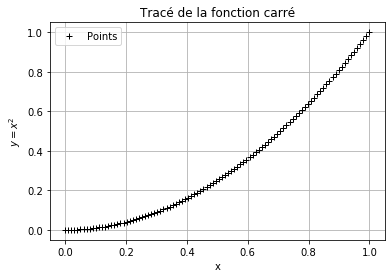

In [25]:
import matplotlib.pyplot as plt

x=np.linspace(0,1,100)
y=x*x

plt.plot(x,y, '+k',label='Points')
plt.xlabel('x')
plt.ylabel('$y=x^2$')
plt.title('Tracé de la fonction carré')
plt.grid()
plt.legend()
plt.show()

Il existe une myriade d'options pour personaliser les graphes. Les plus fréquentes ont des raccourcis, et s'utilisent comme ici entre ' '.

Notez que Python comprend nativement le langage LaTeX.

### Exercice
**Tracer le graphe de la réponse à un échelon de tension d'un circuit RLC**

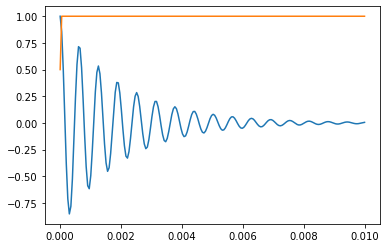

In [90]:
import numpy as np
t=np.linspace(0,1e-2,200)
echelon = (np.sign(t)+1)/2

R=10 #(ohm)
L= 10*1e-3 #(Henri)
C= 1*1e-6 #(Farrad)

w_0 = np.sqrt(1/(L*C))
Q = (1/R)*np.sqrt(L/C)


rlc = np.exp(-(w_0/(2*Q))*t)*(np.cos(w_0*t*np.sqrt(1-1/(4*Q**2)))) 

import matplotlib.pyplot as plt
fig,ax=plt.subplots()

ax.plot(t,rlc)
ax.plot(t,echelon)

# Exercice
* À l'aide de la fonction `randint` du module random de la bibliothèque numpy, écrivez une fonction `somme_dés(n)` retournant le résultat de la somme de n dés à six faces tirés aléatoirement.

* Tracez l'histogramme des résultats de 1000 tirage de 200 dés. Vers quoi converge cette distribution ?
* Trouvez les fonctions permettant de calculer la valeur moyenne et l'écart type de ce tirage (utilisez les méthodes de `numpy`)

10.499714379999999 0.017912166642134613


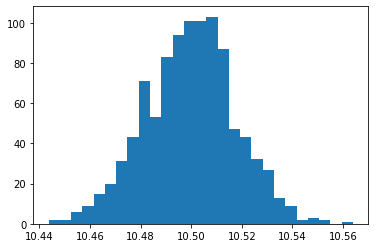

In [39]:
def sum_dice(n):
    return np.sum(np.random.randint(1,21,n))
n=100000
l=np.array([sum_dice(n)/n for k in range(1000)])
fig,ax = plt.subplots()

ax.hist(l,bins='auto')

print(l.mean(),l.std())

## Exercice
* Utilisez les fonctions random du numpy et scatter de matplotlib pour représenter un nuage de point distribué aléatoirement sur le carré [-1,1]x[-1,1] 

* Ajoutez un cercle de rayon r=1 sur ce graphe. (Utilisez la représentation paramétrique du cercle)

Bonus : 
Estimez $\pi$ à partir de ce tirage (il s'agit d'une méthode de Monte-Carlo)

3.1418128

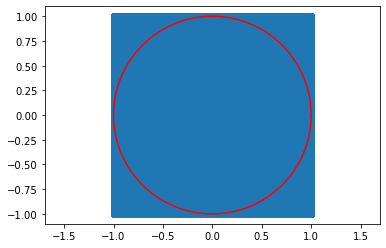

In [38]:
import numpy as np
import matplotlib.pyplot as plt

N=1000
X = 2*(np.random.rand(N)-0.5)
Y = 2*(np.random.rand(N)-0.5)

t=np.linspace(0,2*np.pi,200)

fig,ax=plt.subplots()

ax.scatter(X,Y)
ax.plot(np.cos(t),np.sin(t),color='r')

ax.axis('equal')

R = X**2+Y**2
(np.sum(np.where(R<=1,1,0))/N)*4

In [7]:
X

array([ 0.16507532,  0.72427397,  0.46693532,  0.39733352, -0.10787145,
       -0.4575932 , -0.98954077, -0.45458994, -0.16085194,  0.43493272])

## Exercice
Traçez le potentiel de Morse du diazote :

$$ U(r) =U_0\left( \exp \left(-2a(r-r_0)\right) -2 \exp \left(-a(r-r_0)\right)\right) $$

Pour N$_2$ : $U_0 = 943$kJ/mol ; $r_0=1.08Å$ ; $a=2.73Å^{-1}$.

Pour quelles valeurs de r ce potentiel s'annule ? (utilisez la fonction **bisect** du module scipy.optimize)
Comment fonctionne cette fonction ?

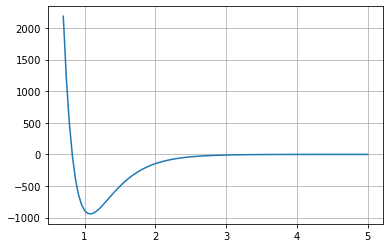

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def Morse(r,U,r0,a):
    return U*(np.exp(-2*a*(r-r0))-2*np.exp(-a*(r-r0)))

r = np.linspace(0.7,5,100)
U = 943
r0=1.08
a=2.73


fig,ax=plt.subplots()
ax.plot(r,Morse(r,U,r0,a))
ax.grid()

In [3]:
from scipy.optimize import bisect
sol=bisect(lambda x :Morse(x,U,r0,a),0.5,1)
print(sol,Morse(sol,U,r0,a))

0.8260999338617694 -9.714768545165953e-09


## Tracé de graphes avec barres d'erreurs et ajustements

### Ajustements

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [1]:
from scipy.optimize import curve_fit
curve_fit?

il s'agit de la méthode la plus répendue pour ajuster une courbe. Cependant le programme officiel à choisi de mettre en avant une autre méthode : `polyfit` du package `numpy`qui ne permet que de faire une régression linéaire (en fait polynomiale)

In [104]:
np.polyfit?

### Exercice 

**Trouver une fonction dans le module NumPy permettant de générer des nombres aléatoires entre 0 et 1. Tracer alors la courbe affine y = 3x + 2 en générant un "bruit aléatoire de mesure"**

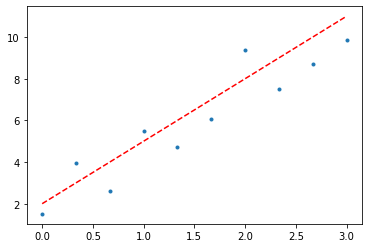

In [99]:
N= 10
x = np.linspace(0,3,N)
data = 3*x+2+ 3*(np.random.rand(N)-0.5)

plt.plot(x,data,'.',
    x,3*x+2,'--r')
plt.show()

In [100]:
def fonction_ajust(x,a,b):
    return a*x+b

popt, pcov = curve_fit(fonction_ajust, x, data)
'''
popt est un vecteur avec tous les paramètres de la fonction d'ajustement

pcov est un vecteur qui contient la matrice de covariances
On peut obtenir les écarts-types des paramètres d'ajustements en prenant les termes diagonaux.
'''

popt

array([2.6503444 , 2.00146332])

In [29]:
pcov

array([[ 0.09082746, -0.13624119],
       [-0.13624119,  0.28762028]])

In [101]:
print("resultat :\n"
      "a=",popt[0],"+/-",pcov[0,0],"\n"
      "b=",popt[1],"+/-",pcov[1,1])

resultat :
a= 2.650344404049782 +/- 0.12478786006719914 
b= 2.0014633200673284 +/- 0.39516155334426345


2.6503444022814824 2.001463322870175


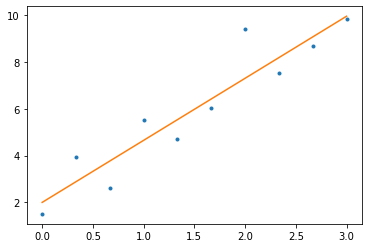

In [103]:
a,b=np.polyfit(x,data,1)
print(a,b)
plt.plot(x,data,'.',
        x,a*x+b)

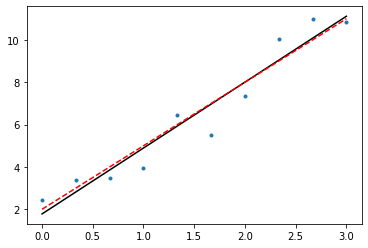

In [31]:
plt.plot(x,data,'.',
     x,fonction_ajust(x,popt[0],popt[1]),'k',
     x,3*x+2,'--r')
plt.show()

### Exercice 

**On a fait deux mesures : une loi d'Ohm, et une décharge d'un condensateur. En ajustant les données expérimentales avec les modèles théoriques, retrouver les valeurs de R et C.**

*Bonus : Recréez vous-mêmes ces données en générant du bruit aléatoire avec la fonction np.random.rand.*

In [32]:
'''

Et oui, les données étaient numériques !

'''

E = 1
R = 1e3
C = 100e-9
tau = R*C #1e-4 s = 0.1 ms

# Données
N= 400

I = np.linspace(0,0.1,N)
Ohm =  R*I + 4*(np.random.rand(N)-0.5)
np.savetxt(r"./Output/data_Ohm_I.txt",I, delimiter=" ")
np.savetxt(r"./Output/data_Ohm_U.txt",Ohm, delimiter=" ")

t = np.linspace(0,10*tau,N)
decharge =  E*np.exp(-t/tau) + 0.03*(np.random.rand(N)-0.5)
np.savetxt(r"./Output/data_RC_t.txt",t, delimiter=" ")
np.savetxt(r"./Output/data_RC_U.txt",decharge, delimiter=" ")

[1000.45963699]


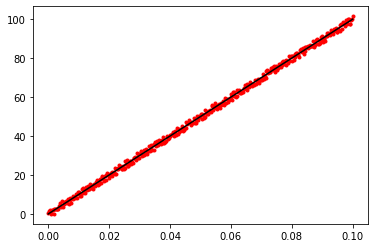

In [33]:
# Ajustement Loi d'Ohm
I = np.loadtxt(r"./Data/data_Ohm_I.txt", delimiter=" ")
U = np.loadtxt(r"./Data/data_Ohm_U.txt", delimiter=" ")

def Ohm(I,R):
    return R*I

popt, pcov = curve_fit(Ohm, I, U)
print(popt)
plt.plot(I,U,'.r',
    I,Ohm(I,popt[0]),'k')
plt.show()

[1.00053473e+00 9.98080826e-05]


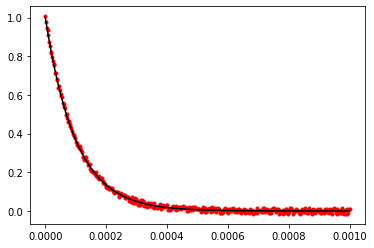

In [36]:
# Ajustement décharge

t = np.loadtxt(r"./Data/data_RC_t.txt", delimiter=" ")
Uc = np.loadtxt(r"./Data/data_RC_U.txt", delimiter=" ")

#plt.plot(I,Ohm,'.')

def decharge(t,E,tau):
    return E*np.exp(-t/tau)

popt, pcov = curve_fit(decharge, t, Uc, p0=np.array([1,1e-3]))
print(popt)
plt.plot(t,Uc,'.r',
    t,decharge(t,popt[0],popt[1]),'k')
plt.show()

### Afficher les barres d'erreurs d'un tableau de données, et les prendre en compte lors de l'ajustement

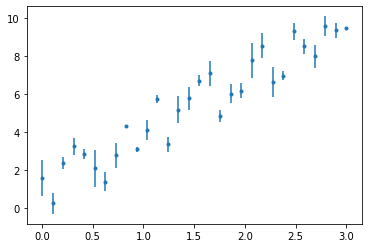

In [37]:
N= 30
x = np.linspace(0,3,N)
data = 3*x+1+ 3*(np.random.rand(N)-0.5)

error = np.random.rand(N)

np.savetxt(r"./Output/data1.txt",data, delimiter=" ")
np.savetxt(r"./Output/error1.txt",error, delimiter=" ")

plt.errorbar(x,data,error, fmt=".")
plt.show()

In [39]:
def funct(x,a,b):
    return a*x+b

popt, pcov = curve_fit(funct, x, data)
popt2, pcov2 = curve_fit(funct, x, data,sigma=error)

print(popt)
print(popt2)

[2.82571472 1.21432055]
[2.41066608 2.23118363]


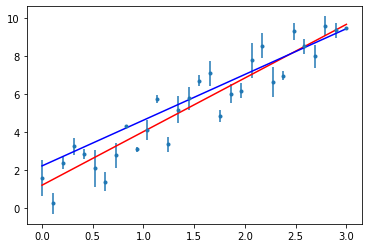

In [40]:
plt.errorbar(x,data,error, fmt=".")

plt.plot(x,funct(x,popt[0],popt[1]),'r',
         x,funct(x,popt2[0],popt2[1]),'b')

## Résolution d'une équation différentielle

Résolution d'une équation différentielle d'une désintégration radioactive : $$\frac{\mathrm{d}N}{\mathrm{d}t}=-\frac{N}{\tau}$$
avec $\tau=1$, et la condition initiale $N(0)=10$, entre $t=0$ et $t=12$.

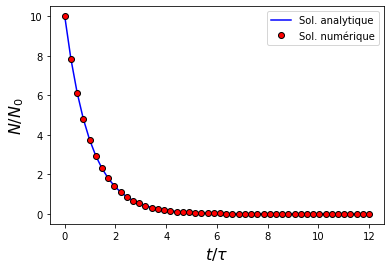

In [45]:
from scipy.integrate import odeint      # Module de résolution des équations différentielles

tau = 1

def deriv(syst, t):
    N = syst[0]                         # Variable1 N(t)
    dNdt=-N/tau                         # Equation différentielle
    return [dNdt]                       # Dérivées des variables

# Paramètres d'intégration
start = 0
end = 12
numsteps = 50
t = np.linspace(start,end,numsteps)

# Conditions initiales et résolution
N0=10              
syst_CI=np.array([N0])                     # Tableau des CI
Sols=odeint(deriv,syst_CI,t)            # Résolution numérique de l'équation différentielle

# Récupération des solutions
N = Sols[:, 0]

# Graphiques des solutions
plt.plot(t, N0*np.exp(-t), '-b', lw=1.5, label=u"Sol. analytique")          # Solution analytique
plt.plot(t, N, 'o', ms=6, mfc='r', mec='k',label=u"Sol. numérique")  # Solution numérique

plt.xlabel(r"$t/\tau$", fontsize=16)      # Label de l'axe des abscisses
plt.ylabel(r"$N/N_{0}$", fontsize=16)     # Label de l'axe des ordonnées

plt.legend()                                                # Appel de la légende
plt.show()


### Exercice 
**Résoudre l'équation différentielle suivante :**
$$\frac{dy}{dx}+x^2y(x) = 0$$

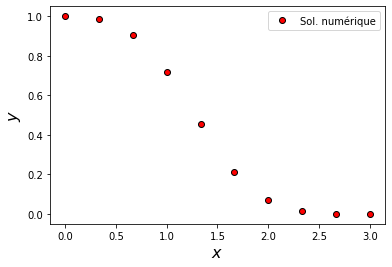

In [46]:
from scipy.integrate import odeint      # Module de résolution des équations différentielles


def deriv(syst, x):
    y = syst[0]
    dydt= -x**2*y        # Equation différentielle
    return [dydt]                       # Dérivées des variables

# Paramètres d'intégration
t = np.linspace(0,12,50)

# Conditions initiales et résolution
syst_CI=np.array([1.])               # Tableau des CI
Sols=odeint(deriv,syst_CI,x)            # Résolution numérique de l'équation différentielle

# Récupération des solutions
N = Sols[:, 0]

# Graphiques des solutions
plt.plot(x, N, 'o', ms=6, mfc='r', mec='k',label=u"Sol. numérique")  # Solution numérique

plt.xlabel(r"$x$", fontsize=16)      # Label de l'axe des abscisses
plt.ylabel(r"$y$", fontsize=16)     # Label de l'axe des ordonnées

plt.legend()                                                # Appel de la légende
plt.show()


### Exercice 
**Résoudre l'équation différentielle du pendule simple :**
$$\frac{d^2y}{dx^2}+\sin(y) = 0$$

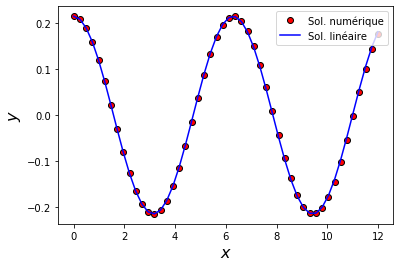

In [51]:
from scipy.integrate import odeint      # Module de résolution des équations différentielles

def deriv(syst, t):
    y1,y2 = syst
    dydt= [y2,-np.sin(y1)]        # Equation différentielle
    return dydt                       # Dérivées des variables

# Paramètres d'intégration
t = np.linspace(0,12,50)

# Conditions initiales et résolution
syst_CI=[np.pi/10 - 0.1, 0.0]               # Tableau des CI
Sols=odeint(deriv,syst_CI,t)            # Résolution numérique de l'équation différentielle

# Récupération des solutions
N = Sols[:, 0]

# Graphiques des solutions
plt.plot(t, N, 'o', ms=6, mfc='r', mec='k',label=u"Sol. numérique")  # Solution numérique
plt.plot(t,syst_CI[0]*np.cos(t),'b',label=u"Sol. linéaire")

plt.xlabel(r"$x$", fontsize=16)      # Label de l'axe des abscisses
plt.ylabel(r"$y$", fontsize=16)     # Label de l'axe des ordonnées

plt.legend()                                                # Appel de la légende
plt.show()


# Passez à au prochain notebook, la suite est 'hors programme'

## Calcul du $\chi^2$ réduit

## Exercice

**Écrire une fonction qui étant donnés trois tableaux x, y, erreurs, et la fonction d'ajustement, calcule le $\chi^2$ réduit défini par :**

$$\frac{\chi^2}{N-2} = \frac{1}{N-2}\sum_i \frac{(y_i-f(x_i))^2}{\sigma_i^2}$$

In [41]:
N= 10
x = np.linspace(0,3,N)
data = 3*x+2+ 2*(np.random.rand(N)-0.5)
error = 0.5*np.linspace(1,4,N)
popt2, pcov2 = curve_fit(funct, x, data,sigma=error)


def chi2reduit (x,y,erreurs,f):
    fxi = f(x)
    N = len(x)
    return 1/(N-2)*sum((y-fxi)**2/erreurs**2)

def f(x):
    return funct(x,popt2[0],popt2[1])

0.1639516065333647

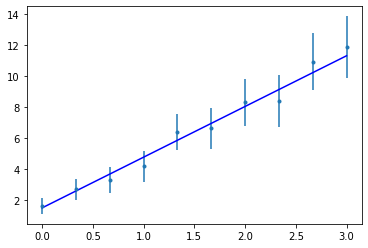

In [42]:
plt.errorbar(x,data,error, fmt=".")
plt.plot(x,funct(x,popt2[0],popt2[1]),'b')

chi2reduit(x,data,error,f)

## Résolution d'un système d'équations

In [43]:
from scipy.optimize import fsolve

def syst(var): 
    '''
    Fonction qui prend en argument les variables du problèmes, et renvoie les équations vérifiées par celles-ci
    '''
    (x, y, z) = var # pour donner des noms aux trois variables dans var =[x,y,z]
    eq1 = x +10*y-3*z-5
    eq2 = 2*x-y+2*z-2
    eq3 = -x+y+z+3
    
    return [eq1, eq2, eq3]

x0, y0, z0 = 0, 0, 0 # Initialisation de la recherche des solutions numériques
sol_ini = [x0, y0, z0]

fsolve(syst, sol_ini)

array([ 2.00000000e+00, -1.20797142e-17, -1.00000000e+00])

### Exercice 

**Mettre sous forme d'un système puis le résoudre le problème suivant.**

*Une mère et sa fille ont à eux deux 36 ans. Sachant que la mère a 30 ans de plus que la fille, quels âges ont-elles ?*

In [44]:
from scipy.optimize import fsolve

def syst(var): 
    '''
    Fonction qui prend en argument les variables du problèmes, et renvoie les équations vérifiées par celles-ci
    '''
    mere,fille = var[0], var[1]
    eq1 = mere + fille - 36
    eq2 = mere - fille - 30
    res = [eq1, eq2]
    return res

sol_ini = [0, 0]

fsolve(syst, sol_ini)

array([33.,  3.])